In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_10443/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('./data/gold/suicidio_sufoc.csv')

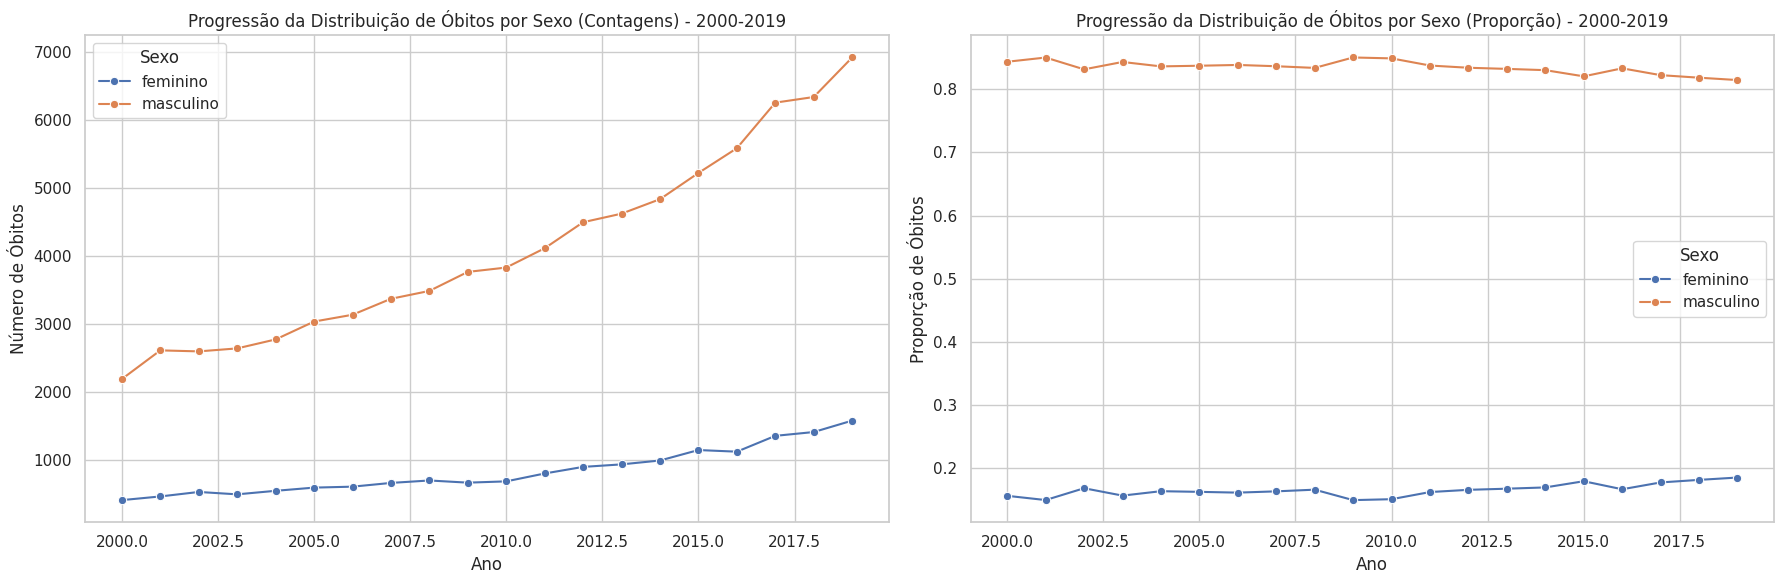

In [12]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar um DataFrame agregado por ano e sexo
sex_count_by_year = df.groupby(['ano', 'sexo']).size().reset_index(name='count')


# Calcular as proporções em relação ao total de óbitos em cada ano
sex_count_by_year['proporcao'] = sex_count_by_year.groupby('ano')['count'].transform(lambda x: x / x.sum())

# Criar uma figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de linhas para contagens absolutas
sns.lineplot(x='ano', y='count', hue='sexo', data=sex_count_by_year, marker='o', linestyle='-', errorbar=None, ax=axs[0])
axs[0].set_title('Progressão da Distribuição de Óbitos por Sexo (Contagens) - 2000-2019')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de Óbitos')
axs[0].legend(title='Sexo')

# Gráfico de linhas para proporções
sns.lineplot(x='ano', y='proporcao', hue='sexo', data=sex_count_by_year, marker='o', linestyle='-', errorbar=None, ax=axs[1])
axs[1].set_title('Progressão da Distribuição de Óbitos por Sexo (Proporção) - 2000-2019')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Proporção de Óbitos')
axs[1].legend(title='Sexo')

# Ajustar layout
plt.tight_layout()
plt.show()